# Simple EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style='whitegrid')

# 1. 파일 불러오기
df = pd.read_parquet("train.parquet")  # 또는 engine='pyarrow', 'fastparquet'

In [2]:
df.head()

,gender,age_group,inventory_id,day_of_week,hour,seq,l_feat_1,l_feat_2,l_feat_3,l_feat_4,...,history_b_22,history_b_23,history_b_24,history_b_25,history_b_26,history_b_27,history_b_28,history_b_29,history_b_30,clicked
0,1.0,7.0,36,5,13,"9,18,269,516,57,97,527,74,317,311,269,479,57,7...",1.0,2.0,1.0,23.0,...,0.070092,0.070092,0.011682,0.004673,0.087226,0.049843,0.015576,0.040498,0.051401,0
1,1.0,7.0,2,5,08,"9,144,269,57,516,97,527,74,315,317,311,269,479...",2.0,2.0,3.0,17.0,...,0.072990,0.072990,0.012165,0.004866,0.045416,0.051904,0.016220,0.042172,0.026763,0
2,1.0,7.0,36,5,11,"269,516,57,97,165,527,74,77,317,269,75,450,15,...",1.0,2.0,1.0,7.0,...,0.057177,0.057177,0.009530,0.003812,0.035577,0.081318,0.012706,0.033036,0.062898,0
3,1.0,8.0,37,5,11,"269,57,516,21,214,269,561,214,269,561,247,516,...",2.0,2.0,2.0,7.0,...,0.100449,0.100449,0.016741,0.006697,0.062502,0.071430,0.022322,0.058037,0.073659,0
4,2.0,7.0,37,5,07,"144,269,57,516,35,479,57,516,527,74,77,318,193...",2.0,2.0,3.0,24.0,...,0.064512,0.064512,0.010752,0.004301,0.040141,0.045875,0.014336,0.037274,0.023654,0


In [3]:
# 2. 기본 정보 확인
print("✅ Shape:", df.shape)
print("\n✅ Columns:", df.columns.tolist())
print("\n✅ Info:")
print(df.info())
print("\n✅ Missing values:\n", df.isnull().sum())

✅ Shape: (10704179, 119)

✅ Columns: ['gender', 'age_group', 'inventory_id', 'day_of_week', 'hour', 'seq', 'l_feat_1', 'l_feat_2', 'l_feat_3', 'l_feat_4', 'l_feat_5', 'l_feat_6', 'l_feat_7', 'l_feat_8', 'l_feat_9', 'l_feat_10', 'l_feat_11', 'l_feat_12', 'l_feat_13', 'l_feat_14', 'l_feat_15', 'l_feat_16', 'l_feat_17', 'l_feat_18', 'l_feat_19', 'l_feat_20', 'l_feat_21', 'l_feat_22', 'l_feat_23', 'l_feat_24', 'l_feat_25', 'l_feat_26', 'l_feat_27', 'feat_e_1', 'feat_e_2', 'feat_e_3', 'feat_e_4', 'feat_e_5', 'feat_e_6', 'feat_e_7', 'feat_e_8', 'feat_e_9', 'feat_e_10', 'feat_d_1', 'feat_d_2', 'feat_d_3', 'feat_d_4', 'feat_d_5', 'feat_d_6', 'feat_c_1', 'feat_c_2', 'feat_c_3', 'feat_c_4', 'feat_c_5', 'feat_c_6', 'feat_c_7', 'feat_c_8', 'feat_b_1', 'feat_b_2', 'feat_b_3', 'feat_b_4', 'feat_b_5', 'feat_b_6', 'feat_a_1', 'feat_a_2', 'feat_a_3', 'feat_a_4', 'feat_a_5', 'feat_a_6', 'feat_a_7', 'feat_a_8', 'feat_a_9', 'feat_a_10', 'feat_a_11', 'feat_a_12', 'feat_a_13', 'feat_a_14', 'feat_a_15', 'fea

In [4]:
# 3. 기초 통계
print("\n✅ Describe:\n", df.describe(include='all'))


✅ Describe:
           gender age_group inventory_id day_of_week      hour       seq  \
count   10686971  10686971     10704179    10704179  10704179  10704179   
unique         2         8           18           7        24   7179942   
top          1.0       7.0            2           2        08       144   
freq     6713514   3706802      2630473     1532022    755311     20142   
mean         NaN       NaN          NaN         NaN       NaN       NaN   
std          NaN       NaN          NaN         NaN       NaN       NaN   
min          NaN       NaN          NaN         NaN       NaN       NaN   
25%          NaN       NaN          NaN         NaN       NaN       NaN   
50%          NaN       NaN          NaN         NaN       NaN       NaN   
75%          NaN       NaN          NaN         NaN       NaN       NaN   
max          NaN       NaN          NaN         NaN       NaN       NaN   

            l_feat_1      l_feat_2      l_feat_3      l_feat_4  ...  \
count   1.0704

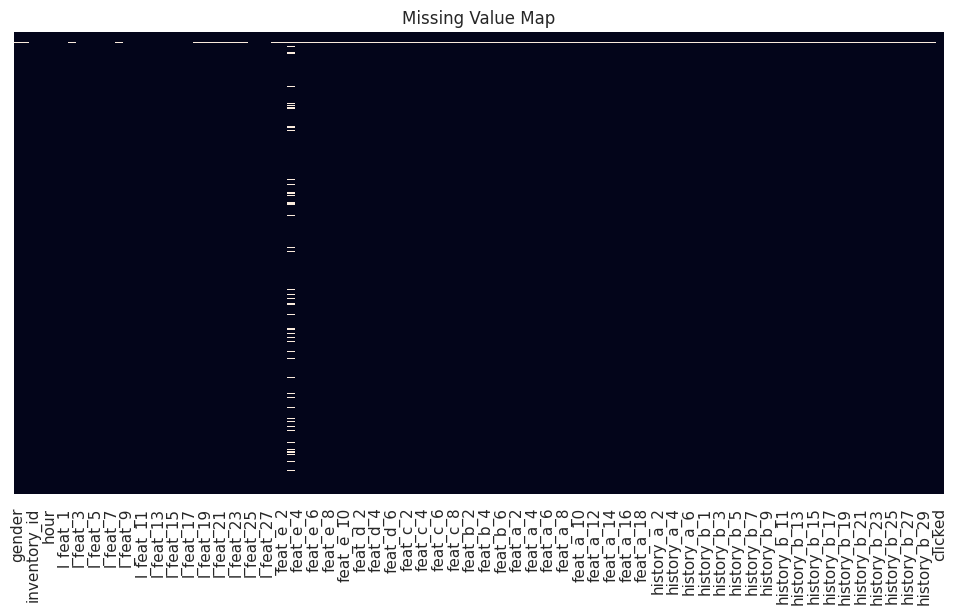

In [5]:
# 4. Null heatmap (시각화용)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Value Map")
plt.show()

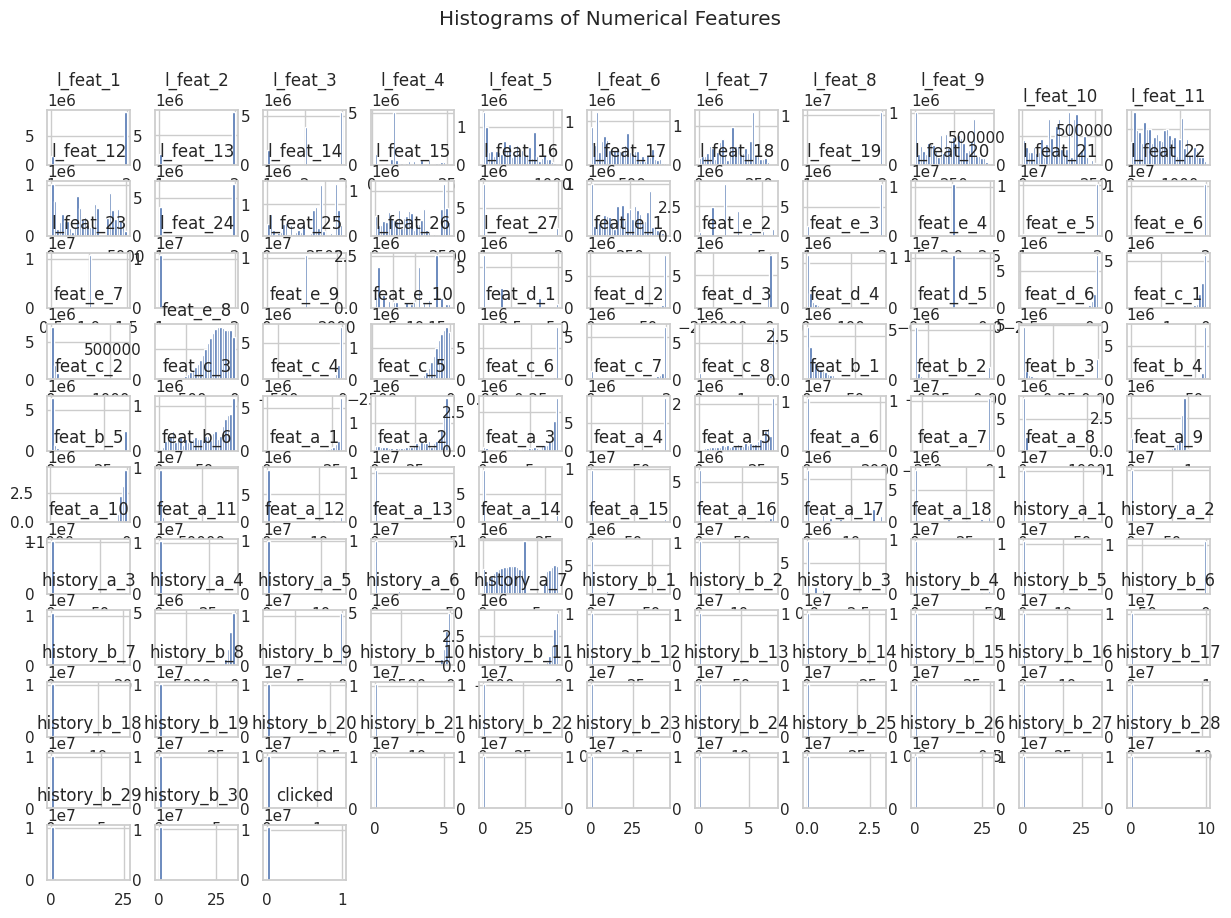

In [6]:
# 5. 수치형 변수 히스토그램
num_cols = df.select_dtypes(include=['int', 'float']).columns
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

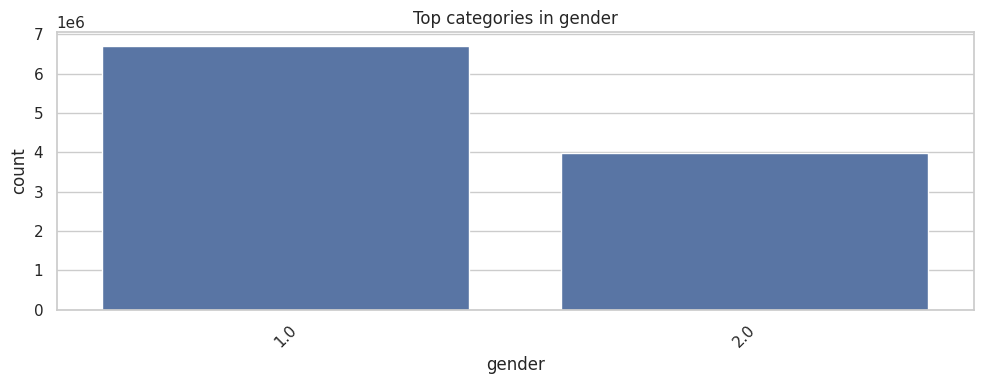

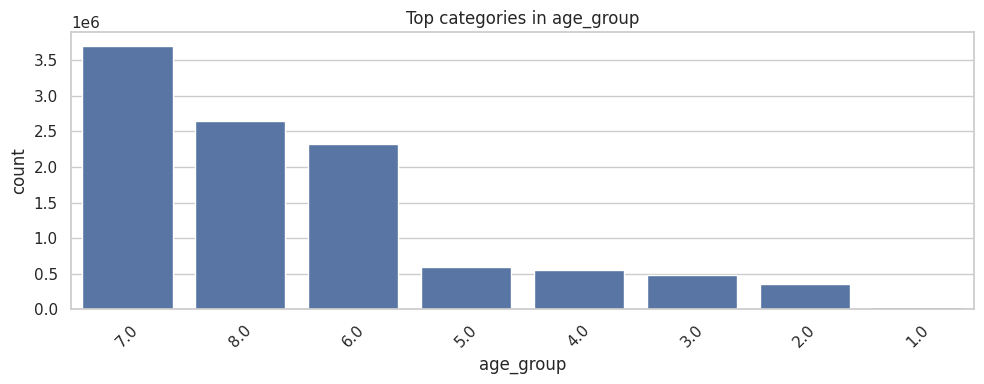

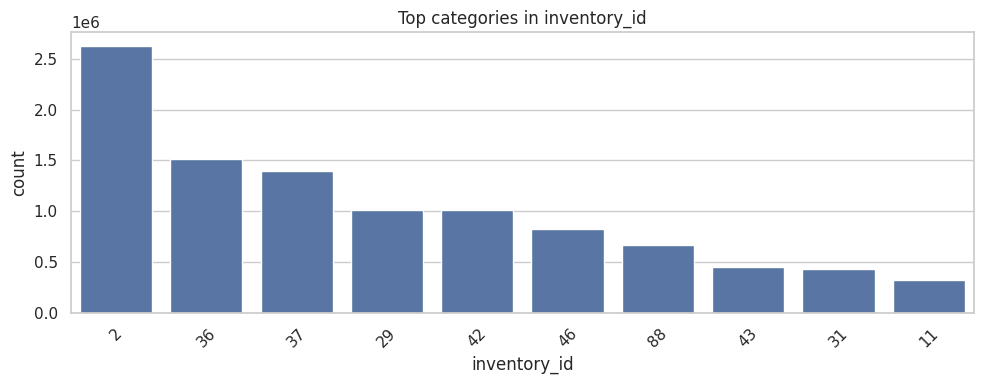

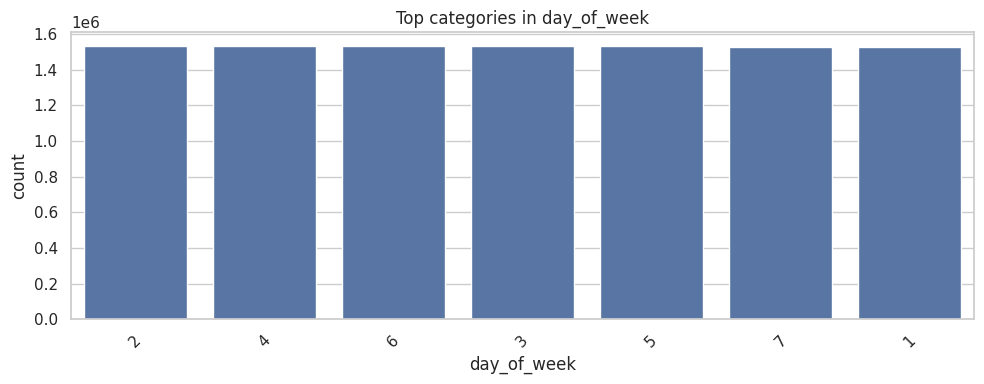

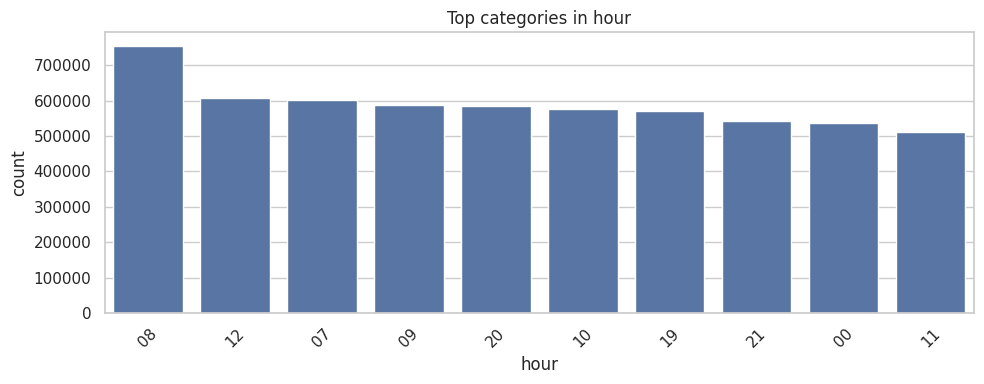

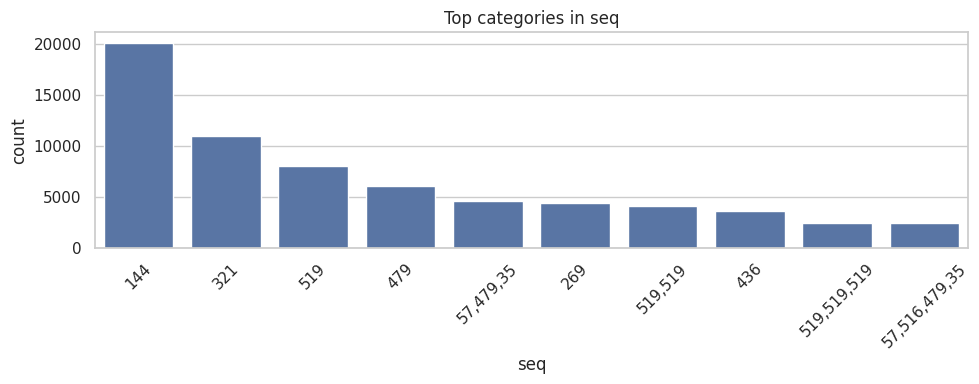

In [7]:
# 6. 범주형 변수 barplot
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])  # 상위 10개
    plt.title(f"Top categories in {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


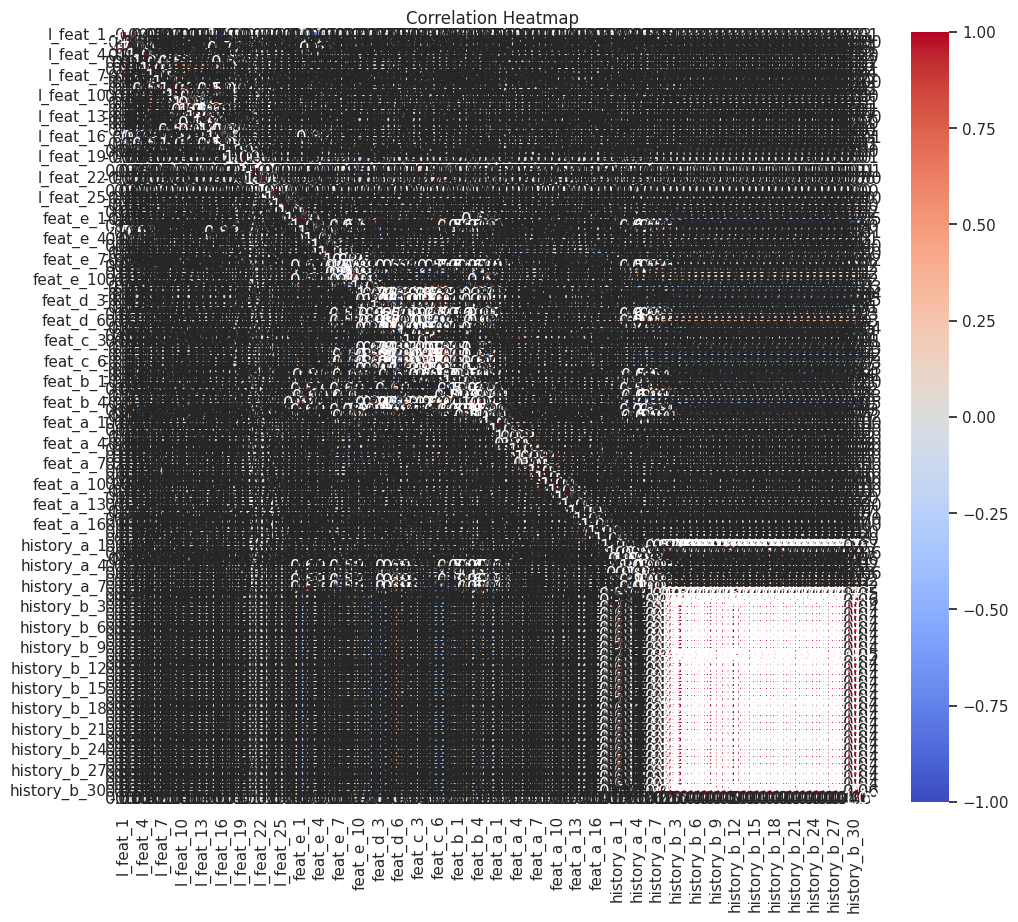

In [8]:
# 7. 상관관계 히트맵
plt.figure(figsize=(12, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()